stable diffusion XL

In [1]:
from diffusers import DiffusionPipeline, StableDiffusionXLPipeline
import torch

# Use StableDiffusionXLPipeline for text-to-image generation
pipe = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [10]:
prompt = "A vertical pole for pole dancing placed in a vibrant jungle. Golden hour light filters through lush foliage, illuminating the sleek metallic dance pole. Surrounded by exotic plants, vines, and tropical flowers, with butterflies and birds enhancing the serene atmosphere."
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

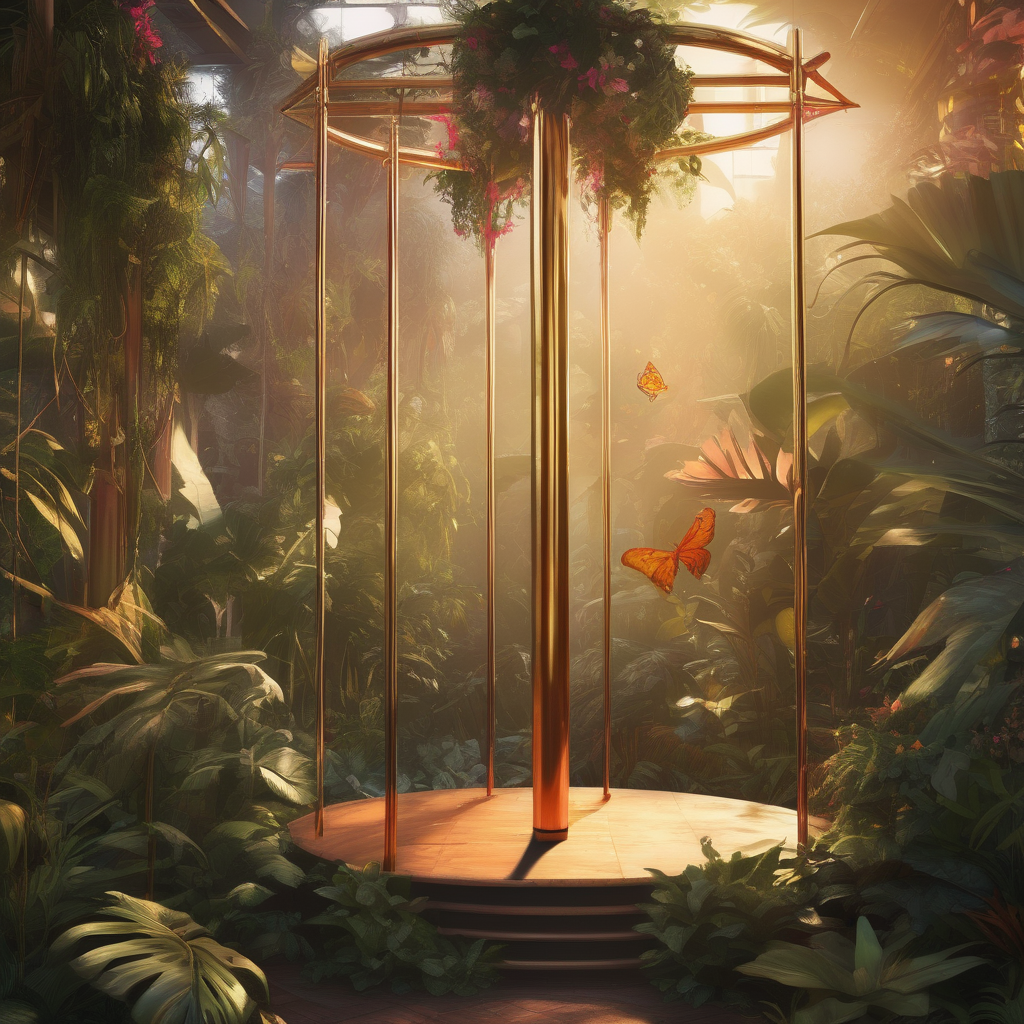

In [11]:
images

In [ ]:
#Trop lourd

# !git lfs install
#!git clone https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5

Git LFS initialized.
Cloning into 'stable-diffusion-v1-5'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 44 (from 1)
Unpacking objects: 100% (45/45), 525.28 KiB | 3.11 MiB/s, done.


In [ ]:
#@title Download pretrained model

#@markdown Name/Path of the initial model.
MODEL_NAME = "CompVis/stable-diffusion-v1-4" #@param {type:"string"}

#@markdown If model should be download from a remote repo. Untick it if the model is loaded from a local path.
download_pretrained_model = True #@param {type:"boolean"}
if download_pretrained_model:
    !git lfs install
    !git clone https://huggingface.co/$MODEL_NAME checkpoints/$MODEL_NAME
    MODEL_NAME = f"./checkpoints/{MODEL_NAME}"
print(f"[*] MODEL_NAME={MODEL_NAME}")

Git LFS initialized.
Cloning into 'checkpoints/CompVis/stable-diffusion-v1-4'...
remote: Enumerating objects: 768, done.
remote: Total 768 (delta 0), reused 0 (delta 0), pack-reused 768 (from 1)
Receiving objects: 100% (768/768), 685.42 KiB | 16.72 MiB/s, done.
Resolving deltas: 100% (140/140), done.
Filtering content: 100% (18/18), 21.71 GiB | 44.99 MiB/s, done.
[*] MODEL_NAME=./checkpoints/CompVis/stable-diffusion-v1-4


In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("./checkpoints/CompVis/stable-diffusion-v1-4")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Text-to-Image with default PLMS scheduler


In [ ]:
# make sure you're logged in with `huggingface-cli login`
from diffusers import StableDiffusionPipeline

pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

  0%|          | 0/50 [00:00<?, ?it/s]

# Text-to-Image with DDIM scheduler


In [ ]:
from diffusers import  DDIMScheduler

scheduler =  DDIMScheduler.from_pretrained("checkpoints/CompVis/stable-diffusion-v1-4", subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    "./checkpoints/CompVis/stable-diffusion-v1-4",
    scheduler=scheduler,
).to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horseDDIM.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# Text-to-Image with K-LMS scheduler


In [ ]:
# make sure you're logged in with `huggingface-cli login`
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_pretrained("checkpoints/CompVis/stable-diffusion-v1-4", subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    "./checkpoints/CompVis/stable-diffusion-v1-4",
    scheduler=lms,
).to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horseKLMS.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# Comparaison

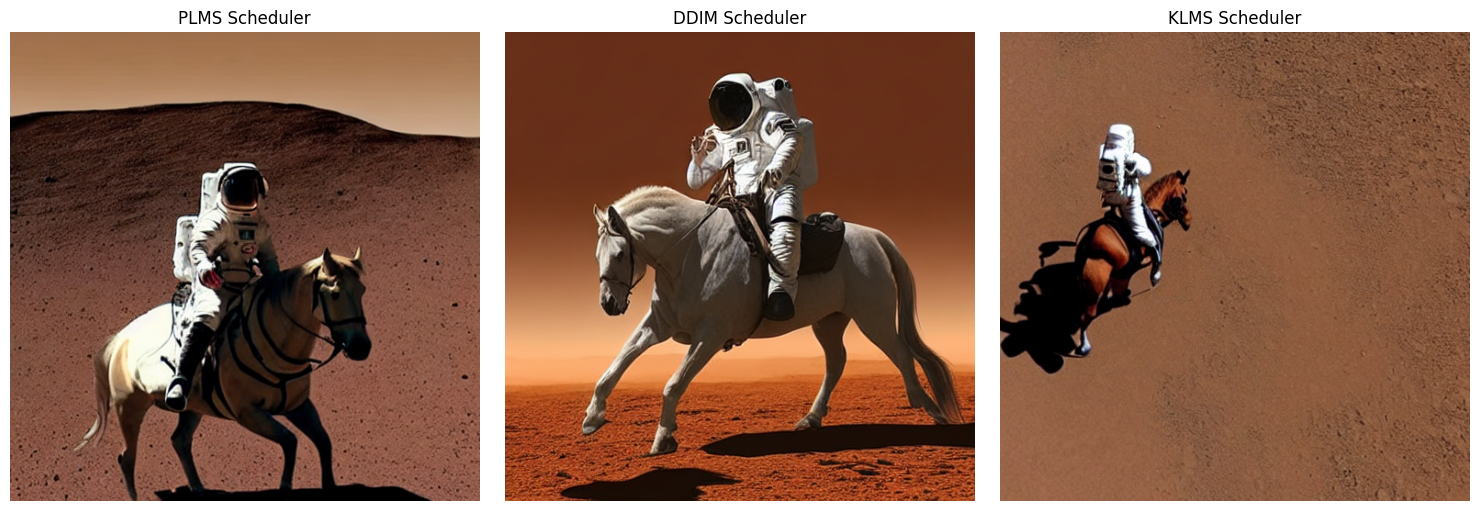

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img_plms = mpimg.imread('astronaut_rides_horse.png')
img_ddim = mpimg.imread('astronaut_rides_horseDDIM.png')
img_klms = mpimg.imread('astronaut_rides_horseKLMS.png')

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the images with titles
axes[0].imshow(img_plms)
axes[0].set_title("PLMS Scheduler")
axes[0].axis('off')

axes[1].imshow(img_ddim)
axes[1].set_title("DDIM Scheduler")
axes[1].axis('off')

axes[2].imshow(img_klms)
axes[2].set_title("KLMS Scheduler")
axes[2].axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

# CycleDiffusion using Stable Diffusion and DDIM scheduler


In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import CycleDiffusionPipeline, DDIMScheduler


# load the scheduler. CycleDiffusion only supports stochastic schedulers.

# load the pipeline
# make sure you're logged in with `huggingface-cli login`
model_id_or_path = "checkpoints/CompVis/stable-diffusion-v1-4"
scheduler = DDIMScheduler.from_pretrained(model_id_or_path, subfolder="scheduler")
pipe = CycleDiffusionPipeline.from_pretrained(model_id_or_path, scheduler=scheduler).to("cuda")

# let's download an initial image
url = "https://raw.githubusercontent.com/ChenWu98/cycle-diffusion/main/data/dalle2/An%20astronaut%20riding%20a%20horse.png"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))
init_image.save("horse.png")

# let's specify a prompt
source_prompt = "An astronaut riding a horse"
prompt = "An astronaut riding an elephant"

# call the pipeline
image = pipe(
    prompt=prompt,
    source_prompt=source_prompt,
    image=init_image,
    num_inference_steps=100,
    eta=0.1,
    strength=0.8,
    guidance_scale=2,
    source_guidance_scale=1,
).images[0]

image.save("horse_to_elephant.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

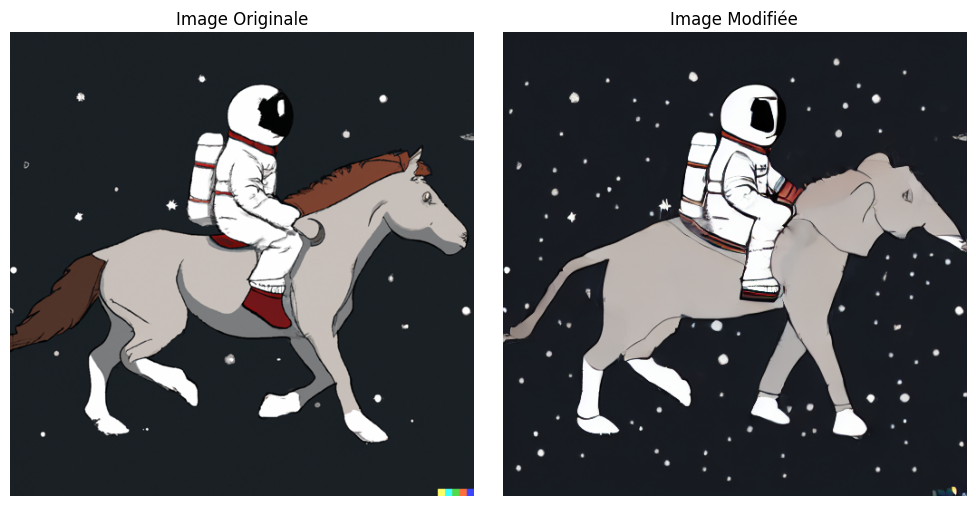

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img_horse = mpimg.imread('horse.png')
img_elephant = mpimg.imread('horse_to_elephant.png')

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images with titles
axes[0].imshow(img_horse)
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(img_elephant)
axes[1].set_title("Image Modifiée")
axes[1].axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

# autre exemple

In [ ]:
# let's try another example
# See more samples at the original repo: https://github.com/ChenWu98/cycle-diffusion
url = "https://raw.githubusercontent.com/ChenWu98/cycle-diffusion/main/data/dalle2/A%20black%20colored%20car.png"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))
init_image.save("black.png")

source_prompt = "A black colored car"
prompt = "A blue colored car"

# call the pipeline
torch.manual_seed(0)
image = pipe(
    prompt=prompt,
    source_prompt=source_prompt,
    image=init_image,
    num_inference_steps=100,
    eta=0.1,
    strength=0.85,
    guidance_scale=3,
    source_guidance_scale=1,
).images[0]

image.save("black_to_blue.png")

  0%|          | 0/85 [00:00<?, ?it/s]

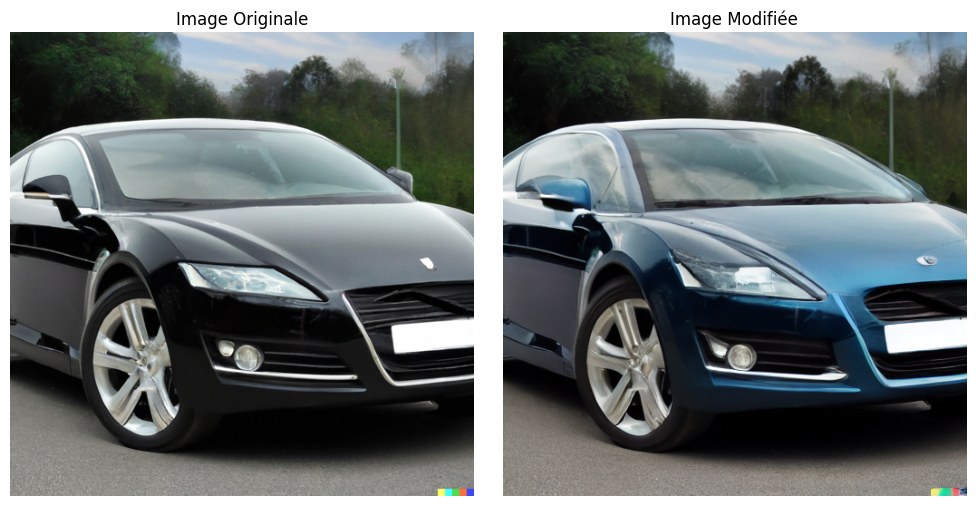

In [ ]:
# Load the images
img_horse = mpimg.imread('black.png')
img_elephant = mpimg.imread('black_to_blue.png')

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images with titles
axes[0].imshow(img_horse)
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(img_elephant)
axes[1].set_title("Image Modifiée")
axes[1].axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

# Mon exemple

## Chargement de la photo à modifer

In [ ]:
# prompt: enregistrer la première image de testAlly.mp4 en photo1.png

import cv2

# Ouvrir la vidéo
video = cv2.VideoCapture('testAlly.mp4')

# Vérifier si la vidéo est ouverte correctement
if not video.isOpened():
    print("Erreur lors de l'ouverture de la vidéo.")
    exit()

# Lire la première image de la vidéo
ret, frame = video.read()

# Vérifier si une image a été lue correctement
if ret:
    # Enregistrer l'image en tant que photo1.png
    cv2.imwrite('photo1.png', frame)
    print("Première image enregistrée avec succès en tant que photo1.png")
else:
    print("Aucune image trouvée dans la vidéo.")

# Libérer les ressources
video.release()

Première image enregistrée avec succès en tant que photo1.png


## Edit de la photo

In [ ]:
init_image = Image.open("guy.png").convert("RGB")
init_image = init_image.resize((512, 512))
init_image.save("photo1_resized.png")

source_prompt = "A guy sitting in a white room"
prompt = "A guy sitting in the jungle"

# call the pipeline
torch.manual_seed(0)
image = pipe(
    prompt=prompt,
    source_prompt=source_prompt,
    image=init_image,
    num_inference_steps=100,
    eta=0.1,
    strength=0.85,
    guidance_scale=3,
    source_guidance_scale=1,
).images[0]

image.save("photo1_edited_black2.png")

  0%|          | 0/85 [00:00<?, ?it/s]

## Affichage des résultats

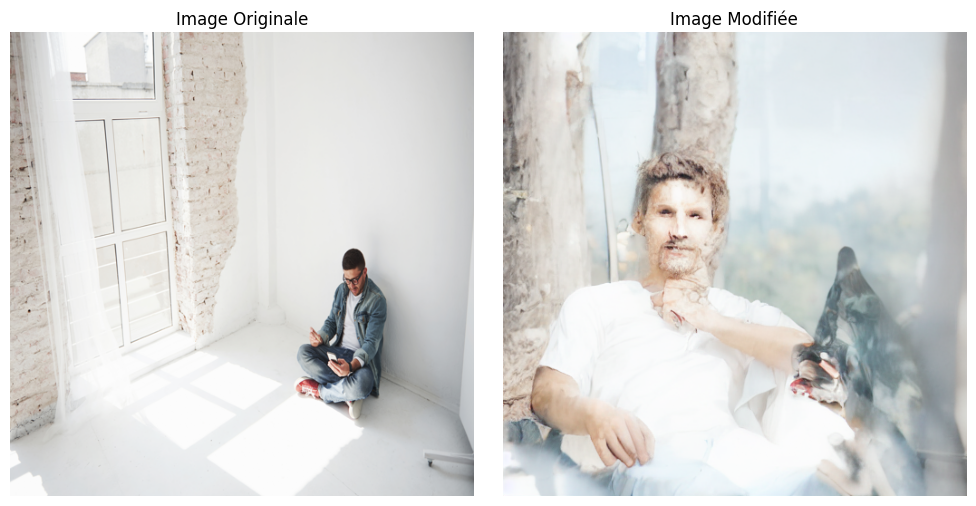

In [ ]:
# Load the images
img_horse = mpimg.imread('photo1_resized.png')
img_elephant = mpimg.imread('photo1_edited_black2.png')

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images with titles
axes[0].imshow(img_horse)
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(img_elephant)
axes[1].set_title("Image Modifiée")
axes[1].axis('off')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# convertir guy.jpg en png

from PIL import Image

# Open the JPG image
try:
  img = Image.open("guy.jpg")
except FileNotFoundError:
  print("Error: guy.jpg not found.")
  exit()

# Save as PNG
img.save("guy.png")
print("Image converted to guy.png")

Image converted to guy.png
